This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

#creando imagenes dummies con valores aleatorios
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

# imagenes con puros ceros 
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation = "relu"),
        layers.Dense(10, activation = "softmax")
    ])
    model.compile(optimizer = "rmsprop",
                  loss = "sparse_categorical_crossentropy",
                  metrics = ["accuracy"])
    return model

# modelo con imagenes generadas a partir de valores aleatorios
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

# modelo con imagenes generadas con puros ceros
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 16ms/step - loss: 0.6154 - accuracy: 0.8116 - val_loss: 0.2882 - val_accuracy: 0.9129
Epoch 2/10
375/375 [==============================] - 6s 15ms/step - loss: 0.2449 - accuracy: 0.9241 - val_loss: 0.1717 - val_accuracy: 0.9487
Epoch 3/10
375/375 [==============================] - 5s 15ms/step - loss: 0.1584 - accuracy: 0.9516 - val_loss: 0.1366 - val_accuracy: 0.9588
Epoch 4/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1124 - accuracy: 0.9656 - val_loss: 0.1335 - val_accuracy: 0.9608
Epoch 5/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0816 - accuracy: 0.9735 - val_loss: 0.1501 - val_accuracy: 0.9565
Epoch 6/10
375/375 [==============================] - 6s 15ms/step - loss: 0.0609 - accuracy: 0.9807 - val_loss: 0.1227 - val_accuracy: 0.9660
Epoch 7/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0449 - accuracy: 0.9853 - val_loss: 0.1240 - val_accuracy: 0.9669

**Plotting a validation accuracy comparison**

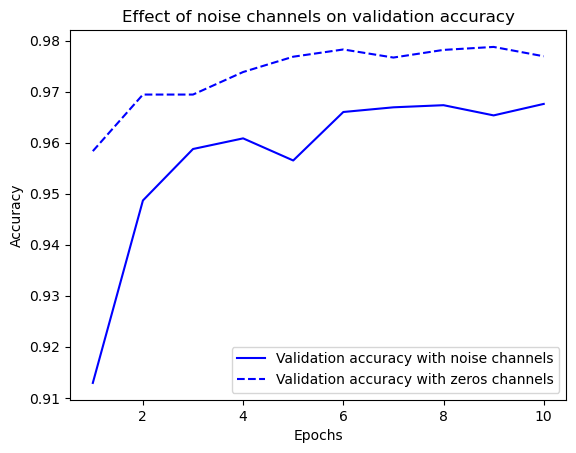

In [12]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show();

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels) #revolvemos las etiquetas


model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 4s 9ms/step - loss: 2.3167 - accuracy: 0.1022 - val_loss: 2.3089 - val_accuracy: 0.1086
Epoch 2/100
375/375 [==============================] - 3s 9ms/step - loss: 2.2996 - accuracy: 0.1179 - val_loss: 2.3110 - val_accuracy: 0.1037
Epoch 3/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2906 - accuracy: 0.1274 - val_loss: 2.3194 - val_accuracy: 0.1024
Epoch 4/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2774 - accuracy: 0.1400 - val_loss: 2.3249 - val_accuracy: 0.1038
Epoch 5/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2611 - accuracy: 0.1552 - val_loss: 2.3341 - val_accuracy: 0.1056
Epoch 6/100
375/375 [==============================] - 3s 8ms/step - loss: 2.2395 - accuracy: 0.1676 - val_loss: 2.3491 - val_accuracy: 0.1038
Epoch 7/100
375/375 [==============================] - 3s 9ms/step - loss: 2.2156 - accuracy: 0.1837 - val_loss: 2.3600 - val_accuracy: 0.1027

**un modelo malo pues las etiquetas de entrenamiento no correspondían exactamente a los valores que tienen asignados**

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

reducir la capacidad de la red puede ayudar a no sobre entrenar

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"), # 512 neuronas 
    layers.Dense(10, activation="softmax") # 10 neuronas de clasificacion
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), #tasa de aprendizaje del modelo alta ("aprendizaje rapido")
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2) # froma compacta de decir que use el 20% de la validación

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 734.0765 - accuracy: 0.4244 - val_loss: 21.5873 - val_accuracy: 0.3517
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 4.2079 - accuracy: 0.2853 - val_loss: 2.1594 - val_accuracy: 0.2746
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 2.8799 - accuracy: 0.2639 - val_loss: 2.4982 - val_accuracy: 0.3067
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 4.2320 - accuracy: 0.2790 - val_loss: 2.1603 - val_accuracy: 0.2401
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 2.7473 - accuracy: 0.2618 - val_loss: 2.1519 - val_accuracy: 0.2527
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 2.5570 - accuracy: 0.2738 - val_loss: 2.0257 - val_accuracy: 0.2696
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 2.8759 - accuracy: 0.3042 - val_loss: 4.3999 - val_accuracy: 0.3

- L1 castiga de forma lineal al peso 
- L2 castigo de forma cuadrada al peso
- Drop-out apaga neuronas

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.RMSprop(1e-2), # tasa de aprendizaje 0.01 "lenta"
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 0.3505 - accuracy: 0.9145 - val_loss: 0.1591 - val_accuracy: 0.9569
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1434 - accuracy: 0.9637 - val_loss: 0.1413 - val_accuracy: 0.9667
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1154 - accuracy: 0.9729 - val_loss: 0.1550 - val_accuracy: 0.9690
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1038 - accuracy: 0.9771 - val_loss: 0.1872 - val_accuracy: 0.9696
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0917 - accuracy: 0.9804 - val_loss: 0.2214 - val_accuracy: 0.9697
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0771 - accuracy: 0.9840 - val_loss: 0.2944 - val_accuracy: 0.9668
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0724 - accuracy: 0.9858 - val_loss: 0.2237 - val_accuracy: 0.9737

aqui podemos ver que las perdidas son más bajas, esto se debe a la tasa de aprendizaje del algoritmo
- un paso pequeño va a llegar al minimo de manera lenta
- pasos grandes en la tasa de aprendizaje  encuntra el mínimo más rápido, pero no se garantiza que sea el minimo global

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

Modelo pobre; con solo 10 neuronas (capa de salida), es insuficiente para el aprendizaje

In [7]:

model = keras.Sequential([layers.Dense(10, activation="softmax")])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6685 - accuracy: 0.8370 - val_loss: 0.3624 - val_accuracy: 0.9000
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3521 - accuracy: 0.9032 - val_loss: 0.3072 - val_accuracy: 0.9154
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3160 - accuracy: 0.9119 - val_loss: 0.2899 - val_accuracy: 0.9197
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2994 - accuracy: 0.9164 - val_loss: 0.2812 - val_accuracy: 0.9233
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2897 - accuracy: 0.9193 - val_loss: 0.2770 - val_accuracy: 0.9227
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2830 - accuracy: 0.9208 - val_loss: 0.2725 - val_accuracy: 0.9253
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2780 - accuracy: 0.9222 - val_loss: 0.2688 - val_accuracy: 0.9265
Epoch 

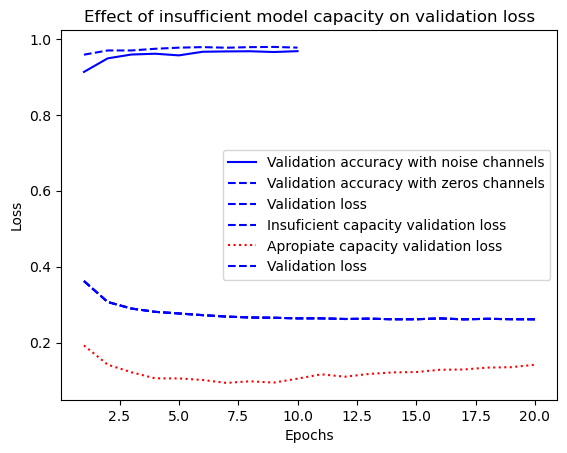

In [11]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Esta red no sobreajusta 

In [9]:
# modelo mejorado con mas capas y mas neuronas
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3646 - accuracy: 0.8960 - val_loss: 0.1929 - val_accuracy: 0.9458
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1666 - accuracy: 0.9501 - val_loss: 0.1422 - val_accuracy: 0.9588
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1172 - accuracy: 0.9647 - val_loss: 0.1222 - val_accuracy: 0.9655
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0899 - accuracy: 0.9729 - val_loss: 0.1061 - val_accuracy: 0.9671
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0721 - accuracy: 0.9783 - val_loss: 0.1060 - val_accuracy: 0.9680
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0588 - accuracy: 0.9826 - val_loss: 0.1019 - val_accuracy: 0.9712
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0501 - accuracy: 0.9846 - val_loss: 0.0941 - val_accuracy: 0.9743
Epoch 

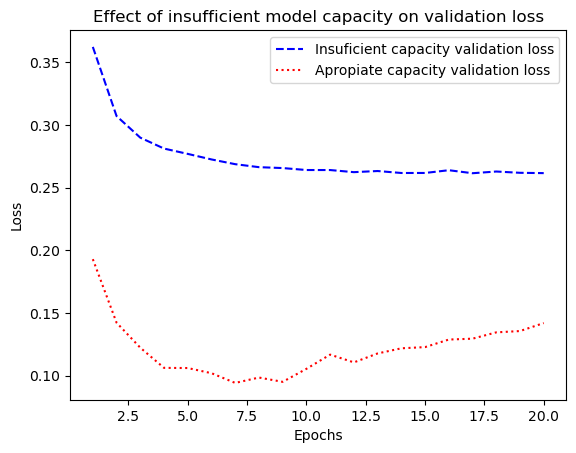

In [13]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Insuficient capacity validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "r:",
         label="Apropiate capacity validation loss")

plt.legend()
plt.show();

Cuando la curva de la perdida empieza a subir nos indica que empieza a sobreajustar

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [15]:
from tensorflow.keras.datasets import imdb
#lectura de datos sobre opinionesbuenas o malas sobre peliculas
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

#función que convierne a vectores las entradas
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

#modelo chiquito 
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy", #porque la salida es si la peli es buena o no
              metrics=["accuracy"])

history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 91ms/step - loss: 0.5267 - accuracy: 0.7846 - val_loss: 0.3963 - val_accuracy: 0.8739
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3195 - accuracy: 0.9008 - val_loss: 0.3405 - val_accuracy: 0.8631
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2334 - accuracy: 0.9270 - val_loss: 0.3296 - val_accuracy: 0.8629
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1857 - accuracy: 0.9408 - val_loss: 0.2807 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1494 - accuracy: 0.9533 - val_loss: 0.2761 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1250 - accuracy: 0.9620 - val_loss: 0.3070 - val_accuracy: 0.8818
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1050 - accuracy: 0.9687 - val_loss: 0.3116 - val_accuracy: 0.8820
Epoch 8/20
30

**Version of the model with lower capacity**
el modelo ya era pequeño pero se redijo la capacidad de este con menos neuronas, al ser de menos neuronas entrena más rapido, pero sera menos eficiente 

In [16]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"), #modelo aun más chiquito
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 7s 197ms/step - loss: 0.6660 - accuracy: 0.6315 - val_loss: 0.6424 - val_accuracy: 0.6518
Epoch 2/20
30/30 [==============================] - 1s 46ms/step - loss: 0.6161 - accuracy: 0.7306 - val_loss: 0.5933 - val_accuracy: 0.7408
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5566 - accuracy: 0.8075 - val_loss: 0.5409 - val_accuracy: 0.8193
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4980 - accuracy: 0.8590 - val_loss: 0.4904 - val_accuracy: 0.8422
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4376 - accuracy: 0.8929 - val_loss: 0.4374 - val_accuracy: 0.8684
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3748 - accuracy: 0.9109 - val_loss: 0.3846 - val_accuracy: 0.8811
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3157 - accuracy: 0.9224 - val_loss: 0.3447 - val_accuracy: 0.8813
Epoch 8/20
3

la diferencia es notable en los val loss, pues en el modelo anterior el val loss estaba más cercano del cero

**Version of the model with higher capacity**
Al hacer un modelo de gran capacidad, el entrenamiento dura mas y es muy probable caer en sobreajuste

In [17]:
#red neuronal gigante muchas neuronas por capas, modelo de mayor capacidad
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 13s 370ms/step - loss: 0.5544 - accuracy: 0.7535 - val_loss: 0.2951 - val_accuracy: 0.8861
Epoch 2/20
30/30 [==============================] - 6s 194ms/step - loss: 0.2580 - accuracy: 0.8961 - val_loss: 0.3011 - val_accuracy: 0.8735
Epoch 3/20
30/30 [==============================] - 6s 188ms/step - loss: 0.1627 - accuracy: 0.9371 - val_loss: 0.2716 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 6s 186ms/step - loss: 0.0841 - accuracy: 0.9714 - val_loss: 0.3435 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 6s 188ms/step - loss: 0.1124 - accuracy: 0.9753 - val_loss: 0.3517 - val_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 6s 186ms/step - loss: 0.0054 - accuracy: 0.9997 - val_loss: 0.5131 - val_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 5s 184ms/step - loss: 8.2626e-04 - accuracy: 1.0000 - val_loss: 0.6285 - val_accuracy: 0.8800
E

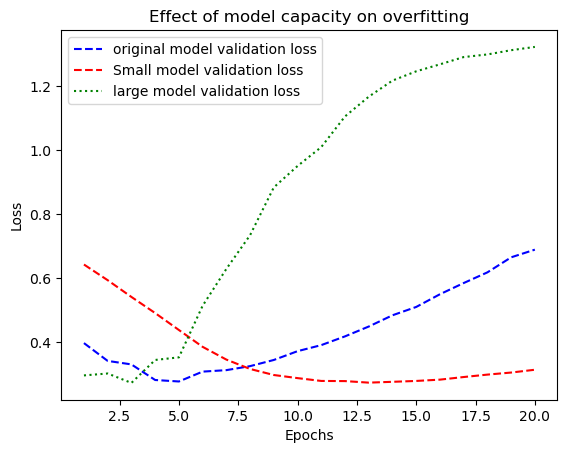

In [19]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="original model validation loss")
plt.title("Effect of model capacity on overfitting")
plt.xlabel("Epochs")
plt.ylabel("Loss")

val_loss = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "r--",
         label="Small model validation loss")

val_loss = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "g:",
         label="large model validation loss")

plt.legend()
plt.show();

- Podemos ver que la roja (menor capacidad), llega el minimo máslento y no sobreajusta tan rapido
- la original llega mpás rapido al minimo pero sobreajusta más rapido tambien
- y la de mayor capacidad (verde) es la que ajusta más rapido pero también sobreajusta muhcísimo más rapido

### **Hay maneras de no caer en el sobreajuste a pesar de tener muchas neuronas**

##### Existen metodos de "Penalizacion" / "Regularizacion" de redes neuronales 
       -L2: pondera/penaliza con el cuadrado del peso de las neuronas + un factor lambda (l2)

#### Adding weight regularization

Las regularizaciones ayudan a que un conjunto de neuronas en especifique no se lleven mucho peso del total de neuronas 

**Adding L2 weight regularization to the model**

In [20]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16, # 16 neuronas
                 kernel_regularizer=regularizers.l2(0.002), #regularizacion l2
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002), #Regularizacion l2
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 6s 157ms/step - loss: 0.5806 - accuracy: 0.7869 - val_loss: 0.4591 - val_accuracy: 0.8679
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3869 - accuracy: 0.8984 - val_loss: 0.3819 - val_accuracy: 0.8864
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3240 - accuracy: 0.9180 - val_loss: 0.3754 - val_accuracy: 0.8782
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2991 - accuracy: 0.9228 - val_loss: 0.3566 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2756 - accuracy: 0.9349 - val_loss: 0.3676 - val_accuracy: 0.8818
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2650 - accuracy: 0.9369 - val_loss: 0.3707 - val_accuracy: 0.8810
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2507 - accuracy: 0.9431 - val_loss: 0.3811 - val_accuracy: 0.8773
Epoch 8/20
3

**Different weight regularizers available in Keras**

#### **Tambien existe la penalizacion L1**
        - Es practicamnete lo mismo que en la penalización l2, pero en lugag de elevar al cuadrado el peso de la neurona es el valor absoluto del peso de la neurona

In [15]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001) # se pueden combinar

#### **Adding dropout**

        - el Drop-out es otro tipo de regularización, este consiste en apagar de manera aleatorio un porcentaje determinado de neuronas e ir regulando los pesos de estas en cada iteracion
        - Lo que se consigue con el drop out es evitar que las neuronas memoricen 

**Adding dropout to the IMDB model**

In [21]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5), # se apagan la mitad de las neuronas
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5), 
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 6s 99ms/step - loss: 0.6344 - accuracy: 0.6385 - val_loss: 0.5189 - val_accuracy: 0.8325
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.5118 - accuracy: 0.7703 - val_loss: 0.4019 - val_accuracy: 0.8765
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.4281 - accuracy: 0.8287 - val_loss: 0.3517 - val_accuracy: 0.8829
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3678 - accuracy: 0.8647 - val_loss: 0.3237 - val_accuracy: 0.8824
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3276 - accuracy: 0.8857 - val_loss: 0.2924 - val_accuracy: 0.8921
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2848 - accuracy: 0.9068 - val_loss: 0.2817 - val_accuracy: 0.8935
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2522 - accuracy: 0.9202 - val_loss: 0.2801 - val_accuracy: 0.8935
Epoch 8/20
30

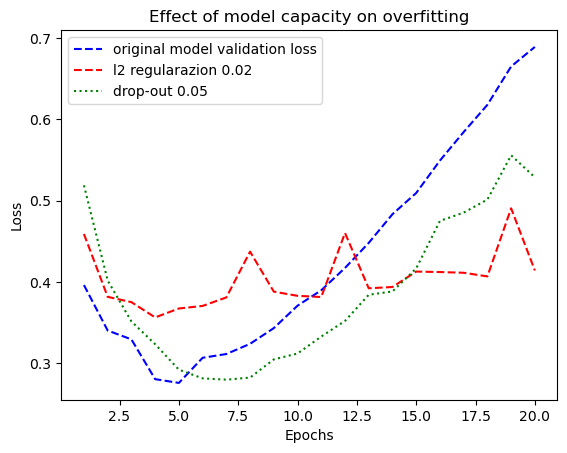

In [24]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="original model validation loss")
plt.title("Effect of model capacity on overfitting")
plt.xlabel("Epochs")
plt.ylabel("Loss")

val_loss = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "r--",
         label="l2 regularazion 0.02")

val_loss = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "g:",
         label="drop-out 0.05")

plt.legend()
plt.show();

## Summary